<a href="https://colab.research.google.com/github/juliawarner/ai_course/blob/master/hw4/course_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Julia Warner

CAP 4630

HW4

###### Imports

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# General Concepts

The most basic definition of **artificial intelligence** describes it as a branch of comupter science dedicated to creating machines/computers that are capable of simulating human intelligence. 

## Machine Learning

**Machine learning** is the branch of AI development where the program will make adjustments to itself in response to its input data. A machine learning program changes itself and learns without needed a human to manually adjust it. 

There are three categories of machine learning. 



1.   **Supervised Learning** where the program is provided with labeled training data that it uses to make connections between the data and the labels, learning how to assign the correct label to each datum. 
2.   **Unsupervised Learning** where the program is provided with unlabeled training data, so it must create its own categories based on data features it determines are important through learning. 
3.   **Reinforcement Learning** where the program learns what the correct course of action to take is through receiving rewards for positive actions and punishments for negative actions. 



## Neural Network Basics

Machine learning is often accomplished through the use of **neural networks**, which are programs comprised of **nodes** that input and output data and **weights** that pass the data from node to node. Learning is accomplished by changing the weights between nodes so that relevant data is given a heavier weight (greater importance) and irrelevant data is given a lower weight. The process of changing the weights of a neural network is called **training**. After the network is trained, it should produce the correct output for each given input.

![alt text](https://www.oracle.com/a/tech/img/art-neural-network-image002.png)

*Image via oracle.com*

The above diagram is an example of a neural network. The circles represent nodes and the arrows represent weights. Each column of nodes is called a **layer**. 

 **Deep Learning** is a type of machine learning referring to neural networks with many layers of nodes. 

# Building a Model

In this section, keras will be used to create a neural network used to classify images of digits from the MNIST digit set. 

#### Load and prep dataset

In [0]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

##Adding layers

The code below uses keras to create a sequential neural network.

Each layer has a **layer type** that determines how the weights attached to the nodes in that layer behave. The network created below consists of two **dense** layers. Dense layers receive input from all of the nodes in the previous layer. 

Each layer also has an **activation function** that determines whether or not each node is "activated", meaning that it passes its data on to the next layer. The first layer uses **relu** , a basic linear activation function, and the second layer uses **softmax**, an activation function used to turn the output of the network into probability values representing how well the data fits into each classification category. 

Each layer also has a size that determines the number of nodes in that layer. 

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Another popular layer type not used in this example is a **convolutional layer**. Convolutional layers pass filters over the data in order to detect certain features. 

Different layer types, layer sizes, activation functions, and number of layers in your network all effect what features are detected and how they are detected. When completing a machine learning problem using a neural network, experiment with different combinations to see which works best. 

# Compiling a Model

After the model is built, it is compiled using a single line of code. 

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Three new parts of the model are introduced in this line. 

The **optimizer** determines the **learning rate** (explained below). Optimizers are necissary because they allow for a dynamic learning rate, which reduces the potential for overfitting. The optimizer used here is **rmsprop**, which selects a different learning rate for each parameter based on its needs, automatically adjusts those learning rates, and attempts to dampen oscillations (overshooting). Other popular optimizers are **Momentum**, which takes previous learning rates into consideration when adjusting learning rates, and **Adam**, which combines the strategies of both momentum and rmsprop. 

The **loss** determines how the correctness of the network's output will be determined. **Categorical crossentropy** is used for networks that produce a probability distribution as an output. It compares the probability generated for each possible category with the ground truth probability distribution, which will be 1 for the true category and 0 for all others.

The **metrics** determine what the network will keep track of as it learns. **Accuracy** shows how good the model is as at correctly determining the category of the data. **Loss** represents how far off the model's output is from the ground truth output. 

## Importance of Learning Rate

The **learning rate** helps determine how much each weight will be changed each time the weights are updated. In the most basic stochastic gradient descent example, the learning rate is multiplied by the loss to determine how much the weight should change. 

Having a learning rate that is too high will cause the weights to change too fast and by too great an amount, resulting in overshooting and missing the best possible weight. Having a learning rate this is too low means the weights won't change by a great enough amount each time they are updated. This will cause the training to take too long. 

# Training a Model

The below line of code initiates the training for the model. 

The **epochs** determine how long the model will train for. In each epoch, each peice of data in the training data set is passed through the network and learned from. The **batch size** determines how many peices of data are passed through the network before updating the weights. 

In [0]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 6s 98us/step - loss: 0.2520 - acc: 0.9283 - val_loss: 0.1337 - val_acc: 0.9617
Epoch 2/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.1037 - acc: 0.9693 - val_loss: 0.0888 - val_acc: 0.9725
Epoch 3/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0690 - acc: 0.9799 - val_loss: 0.0860 - val_acc: 0.9729
Epoch 4/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0492 - acc: 0.9855 - val_loss: 0.0744 - val_acc: 0.9774
Epoch 5/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0372 - acc: 0.9886 - val_loss: 0.0680 - val_acc: 0.9781
Epoch 6/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0284 - acc: 0.9919 - val_loss: 0.0633 - val_acc: 0.9813
Epoch 7/10
60000/60000 [==

## Training and Testing

Two sets of data are used when creating a machine learning model: the **testing data** and the **training data**. 

The training data is what is used to change the weights in the model. Each piece of training data is pushed through the network, the loss is evaluated, and the weights are updated accordingly. 

The testing data is used to evaluate the effectiveness of the model on data that it hasn't seen before. Models have a tendency to memorize the training data and overfit, meaning it won't be able to correctly categorize data that it hasn't seen. Keeping an eye on the accuracy of the model on testing data can help prevent overfitting.  

## Overfitting and Underfitting

**Overfitting** happens when a machine learning model has memorized the training data. Instead of generalizing about common features, the model recognizes each peice of training data and knows what category it belongs to. Models that overfit have a high training accuracy but a low testing accuracy. Overfitting is caused by training for too long or having a model that is too complex. 

**Underfitting** happens when a machine learning models cannot detect any useful features within the training data. The model is either too simple or has not been trained for long enough, so it either can't learn or didn't have a long enough time to learn anything meaningful.

## Analyzing the training results

It's always a good idea to create graphs of the model's accuracy and loss as training progressed. 

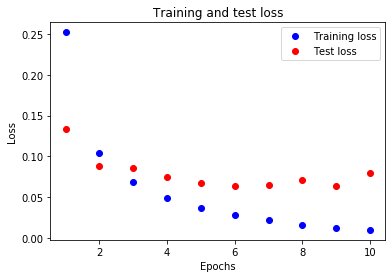

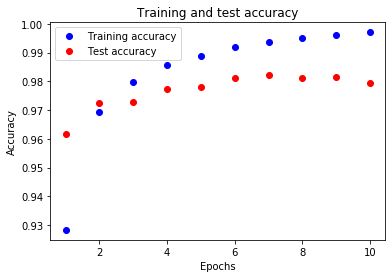

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The graphs show a good amount of improvement for both loss and accuracy as the training progressed. Towards the end, the gap between the training and testing accuracy/loss started to increase. Training accuracy/loss continued to improve while it stagnated for the testing data. This is an indication of slight overfitting. 

# Finetuning a Pretrained Model

The process of finetuning a pretrained model includes two steps: feature extraction and the actual finetuning itself. 

## Feature Extraction

**Feature Extraction** is the process of using the features detected in a pretrained model as a basis for your new model. 

Feature extraction is accomplished as follows:


1.   Obtain a pre-trained model. Even if the model is detecting something completely different from what you're trying to detect, the intermediate layers before the final classification layers learn useful data features that can be applied to your goals. 
2.   Remove the top classification layers of the pre-trained model. 
3.   Freeze the layers of the pre-trained model. The weights on those layers are already set to effectively detect features, so you don't want to change them with new training just yet. 
4.   Add your own classification layers on top of the pre-trained base. The pre-trained base model will pass its features to your classification layers, helping your model attain better accuracy. 
5.   Train your model. The weights for your classifier will update and make use of the features extracted from the data by the pre-trained model. This will ensure better model accuracy than creating a model completely from scratch. 

After completing the deature extraction training, continue on to finetuning. 



##Finetuning

**Finetuning** is the process of re-training the top layers of the pretrained model so that they are better fitted to your purposes. 

Finetuning is accomplished as follows:


1.   Only finetune a model that has gone through the feature extraction process. If you were to finetune with your untrained classifier on top of the pretrained model, the weights would be off due to the randomization of weights in the untrained classifier. 
2.   Unfreeze the top layers of the pretrained model. Leave the lower layers untrainable because those layers detect useful general features. Only the upper level layers should be retrained because they are used to detect higher-level, specific features. 
3.   Retrain the model. The weights of the upper layers of the pre-trained model and those of your classifier will be altered. This will create better learning of specific features relevant to your classifier and improve accuracy. 

Once the fintuning process is complete, you model will have greater accuracy than a model created from scratch without feature exprection or finetuning. 

